# PCA (Principal Component Analysis) - Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

## Standardizing Data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## PCA

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y
print (pca_df.head(15))

         PC1       PC2  Target
0   3.316751  1.443463       0
1   2.209465 -0.333393       0
2   2.516740  1.031151       0
3   3.757066  2.756372       0
4   1.008908  0.869831       0
5   3.050254  2.122401       0
6   2.449090  1.174850       0
7   2.059437  1.608963       0
8   2.510874  0.918071       0
9   2.753628  0.789438       0
10  3.479737  1.302333       0
11  1.754753  0.611977       0
12  2.113462  0.675706       0
13  3.458157  1.130630       0
14  4.312784  2.095976       0


In [8]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")
print(f"Total Explained Variance (2 PCs): {explained_variance.sum():.2%}")

Explained Variance by each component: [0.36198848 0.1920749 ]
Total Explained Variance (2 PCs): 55.41%


## Visualization

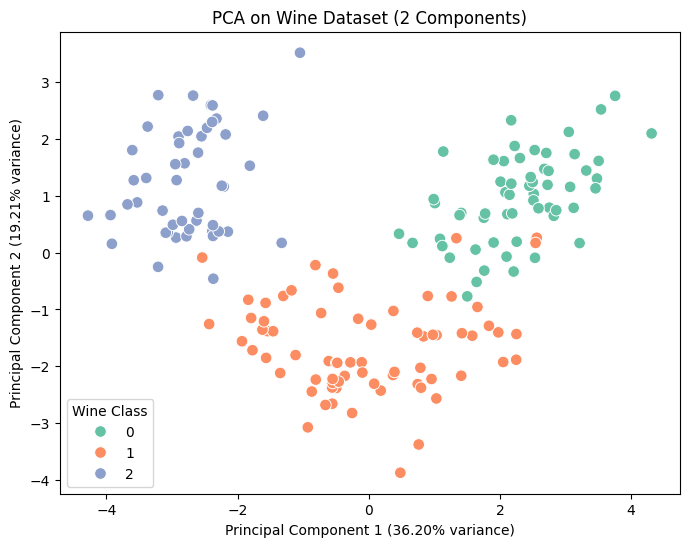

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='Set2', s=70)
plt.title('PCA on Wine Dataset (2 Components)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)')
plt.legend(title='Wine Class')
plt.show()

In [10]:
loadings = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("\nPCA Component Loadings:")
print(loadings.T)


PCA Component Loadings:
                                   PC1       PC2
alcohol                       0.144329  0.483652
malic_acid                   -0.245188  0.224931
ash                          -0.002051  0.316069
alcalinity_of_ash            -0.239320 -0.010591
magnesium                     0.141992  0.299634
total_phenols                 0.394661  0.065040
flavanoids                    0.422934 -0.003360
nonflavanoid_phenols         -0.298533  0.028779
proanthocyanins               0.313429  0.039302
color_intensity              -0.088617  0.529996
hue                           0.296715 -0.279235
od280/od315_of_diluted_wines  0.376167 -0.164496
proline                       0.286752  0.364903
